<a href="https://colab.research.google.com/github/Asjal-Git/DevelopersHub_Tasks/blob/main/Task-3_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement and Goal

## Problem Statement:
Heart disease is a leading cause of mortality globally. Early and accurate prediction of heart disease is crucial for timely intervention and improved patient outcomes.

## Goal:
The goal of this project is to develop a classification model that can predict the presence of heart disease in patients based on various clinical and demographic factors. This will involve:

1. Loading and cleaning the heart disease dataset.
2. Performing Exploratory Data Analysis (EDA) to understand the data and identify key features.
3. Splitting the dataset into training and testing sets.
4. Training and evaluating a classification model (e.g., Logistic Regression, Decision Tree, etc.).
5. Assessing the model's performance using relevant metrics (accuracy, precision, recall, F1-score, AUC-ROC).
6. Identifying the most influential features for heart disease prediction.

In [35]:
#Including all the required libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

Importing the Dataset from Kaggle

In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-data


In [37]:
#Loading the dataset:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

In [38]:
#Cleaning the dataset:
df = df.dropna()

In [39]:
#Exploring overall structure and data types:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  299.000000  299.000000  299.000000  299.00

In [40]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


# Perform Exploratory Data Analysis (EDA) to understand trends.

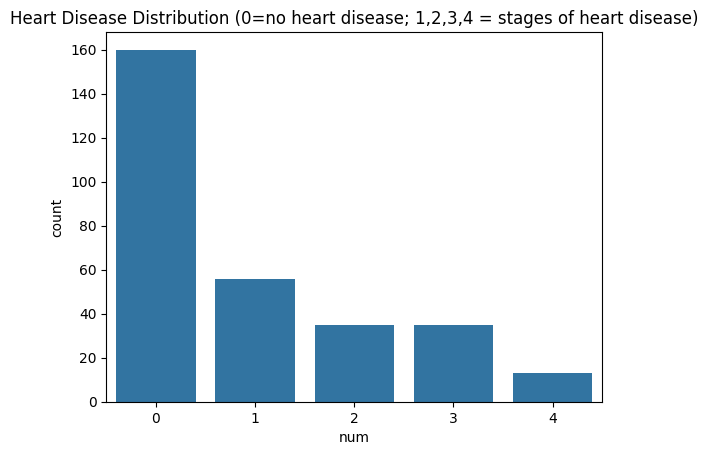

In [41]:
#Checking how many patients have heart disease:
sns.countplot(x='num', data=df)
plt.title('Heart Disease Distribution (0=no heart disease; 1,2,3,4 = stages of heart disease)')
plt.show()

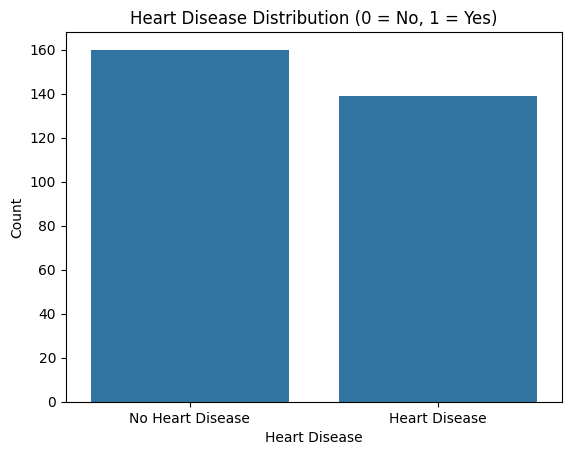

In [42]:
# Creating a new column 'heart_disease' where 0 indicates no heart disease and 1 indicates any level of heart disease
df['heart_disease'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Plotting the distribution of the new 'heart_disease' column
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

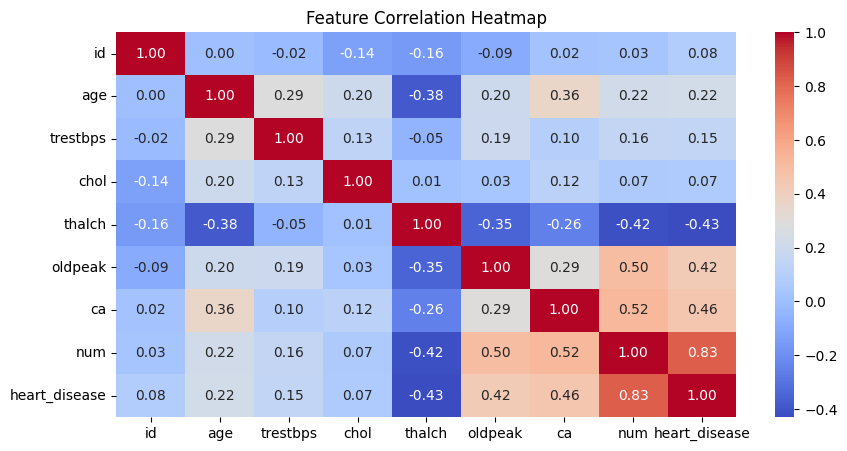

In [43]:
#Checking which features are most related to the presence of heart disease:
plt.figure(figsize=(10, 5))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

## Visualize relationships between key features and heart disease
Create visualizations (e.g., boxplots, scatter plots) to explore the relationship between highly correlated features (like `ca`, `oldpeak`, `thalch`) and the `heart_disease` target variable.


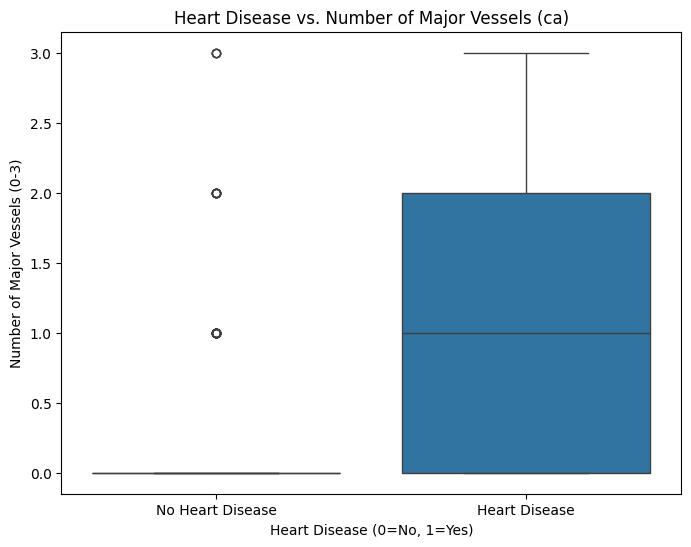

In [44]:
# Visualize the relationship between 'ca' and 'heart_disease'
plt.figure(figsize=(8, 6))
sns.boxplot(x='heart_disease', y='ca', data=df)
plt.title('Heart Disease vs. Number of Major Vessels (ca)')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Number of Major Vessels (0-3)')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

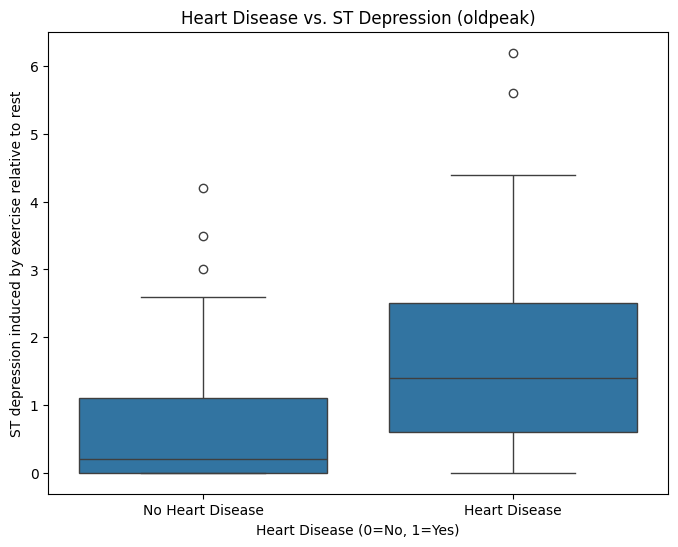

In [45]:
# Visualize the relationship between 'oldpeak' and 'heart_disease'
plt.figure(figsize=(8, 6))
sns.boxplot(x='heart_disease', y='oldpeak', data=df)
plt.title('Heart Disease vs. ST Depression (oldpeak)')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('ST depression induced by exercise relative to rest')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

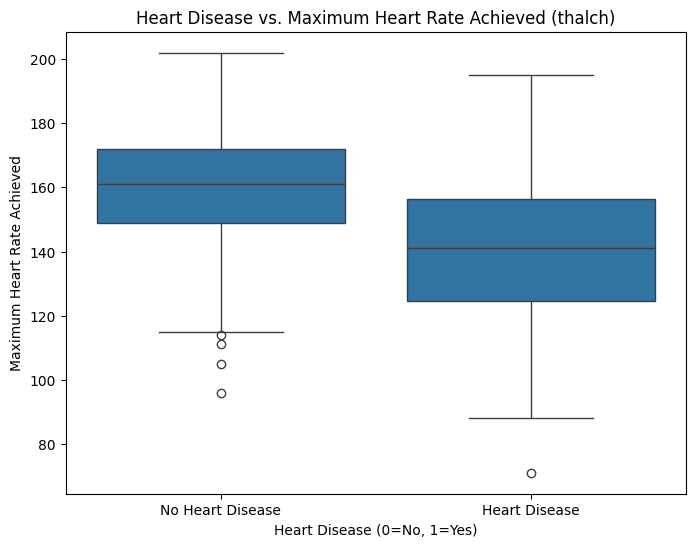

In [46]:
# Visualize the relationship between 'thalch' and 'heart_disease'
plt.figure(figsize=(8, 6))
sns.boxplot(x='heart_disease', y='thalch', data=df)
plt.title('Heart Disease vs. Maximum Heart Rate Achieved (thalch)')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

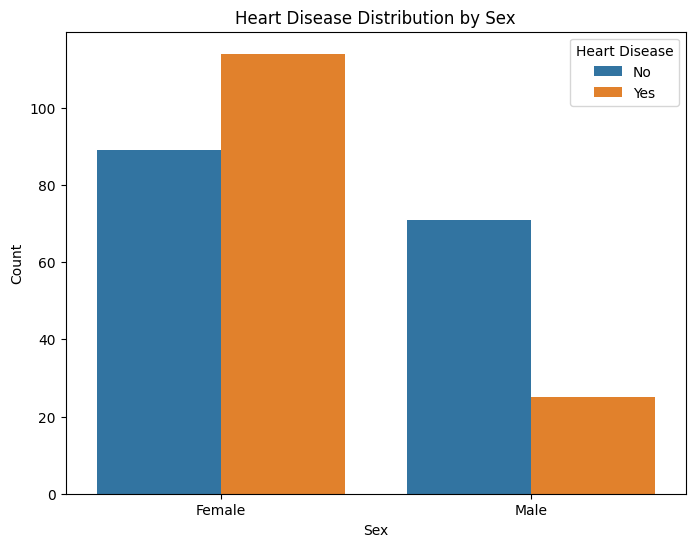

In [47]:
# Visualize the relationship between 'sex' and 'heart_disease'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='heart_disease', data=df)
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

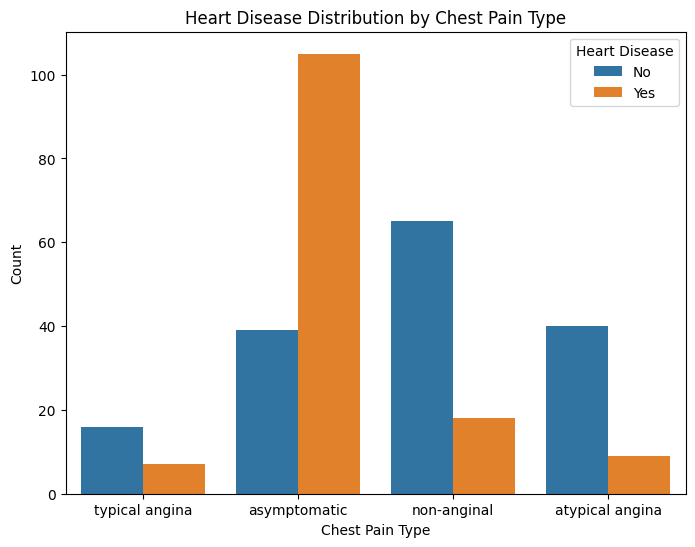

In [48]:
# Visualize the relationship between 'cp' and 'heart_disease'
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='heart_disease', data=df)
plt.title('Heart Disease Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

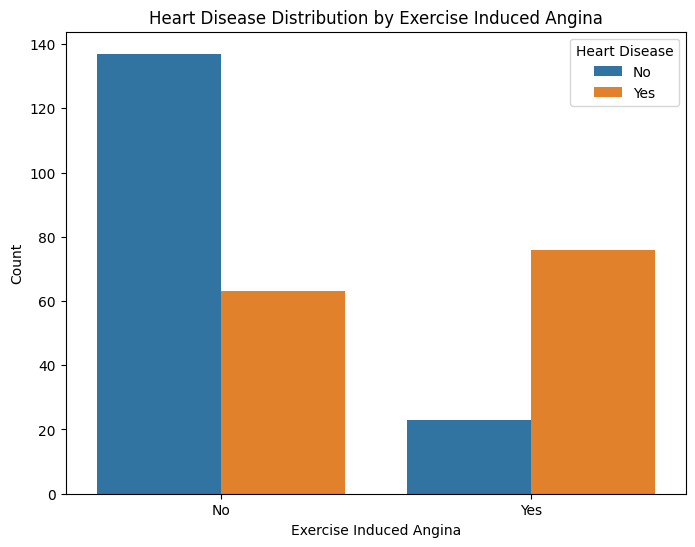

In [49]:
# Visualize the relationship between 'exang' and 'heart_disease'
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='heart_disease', data=df)
plt.title('Heart Disease Distribution by Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

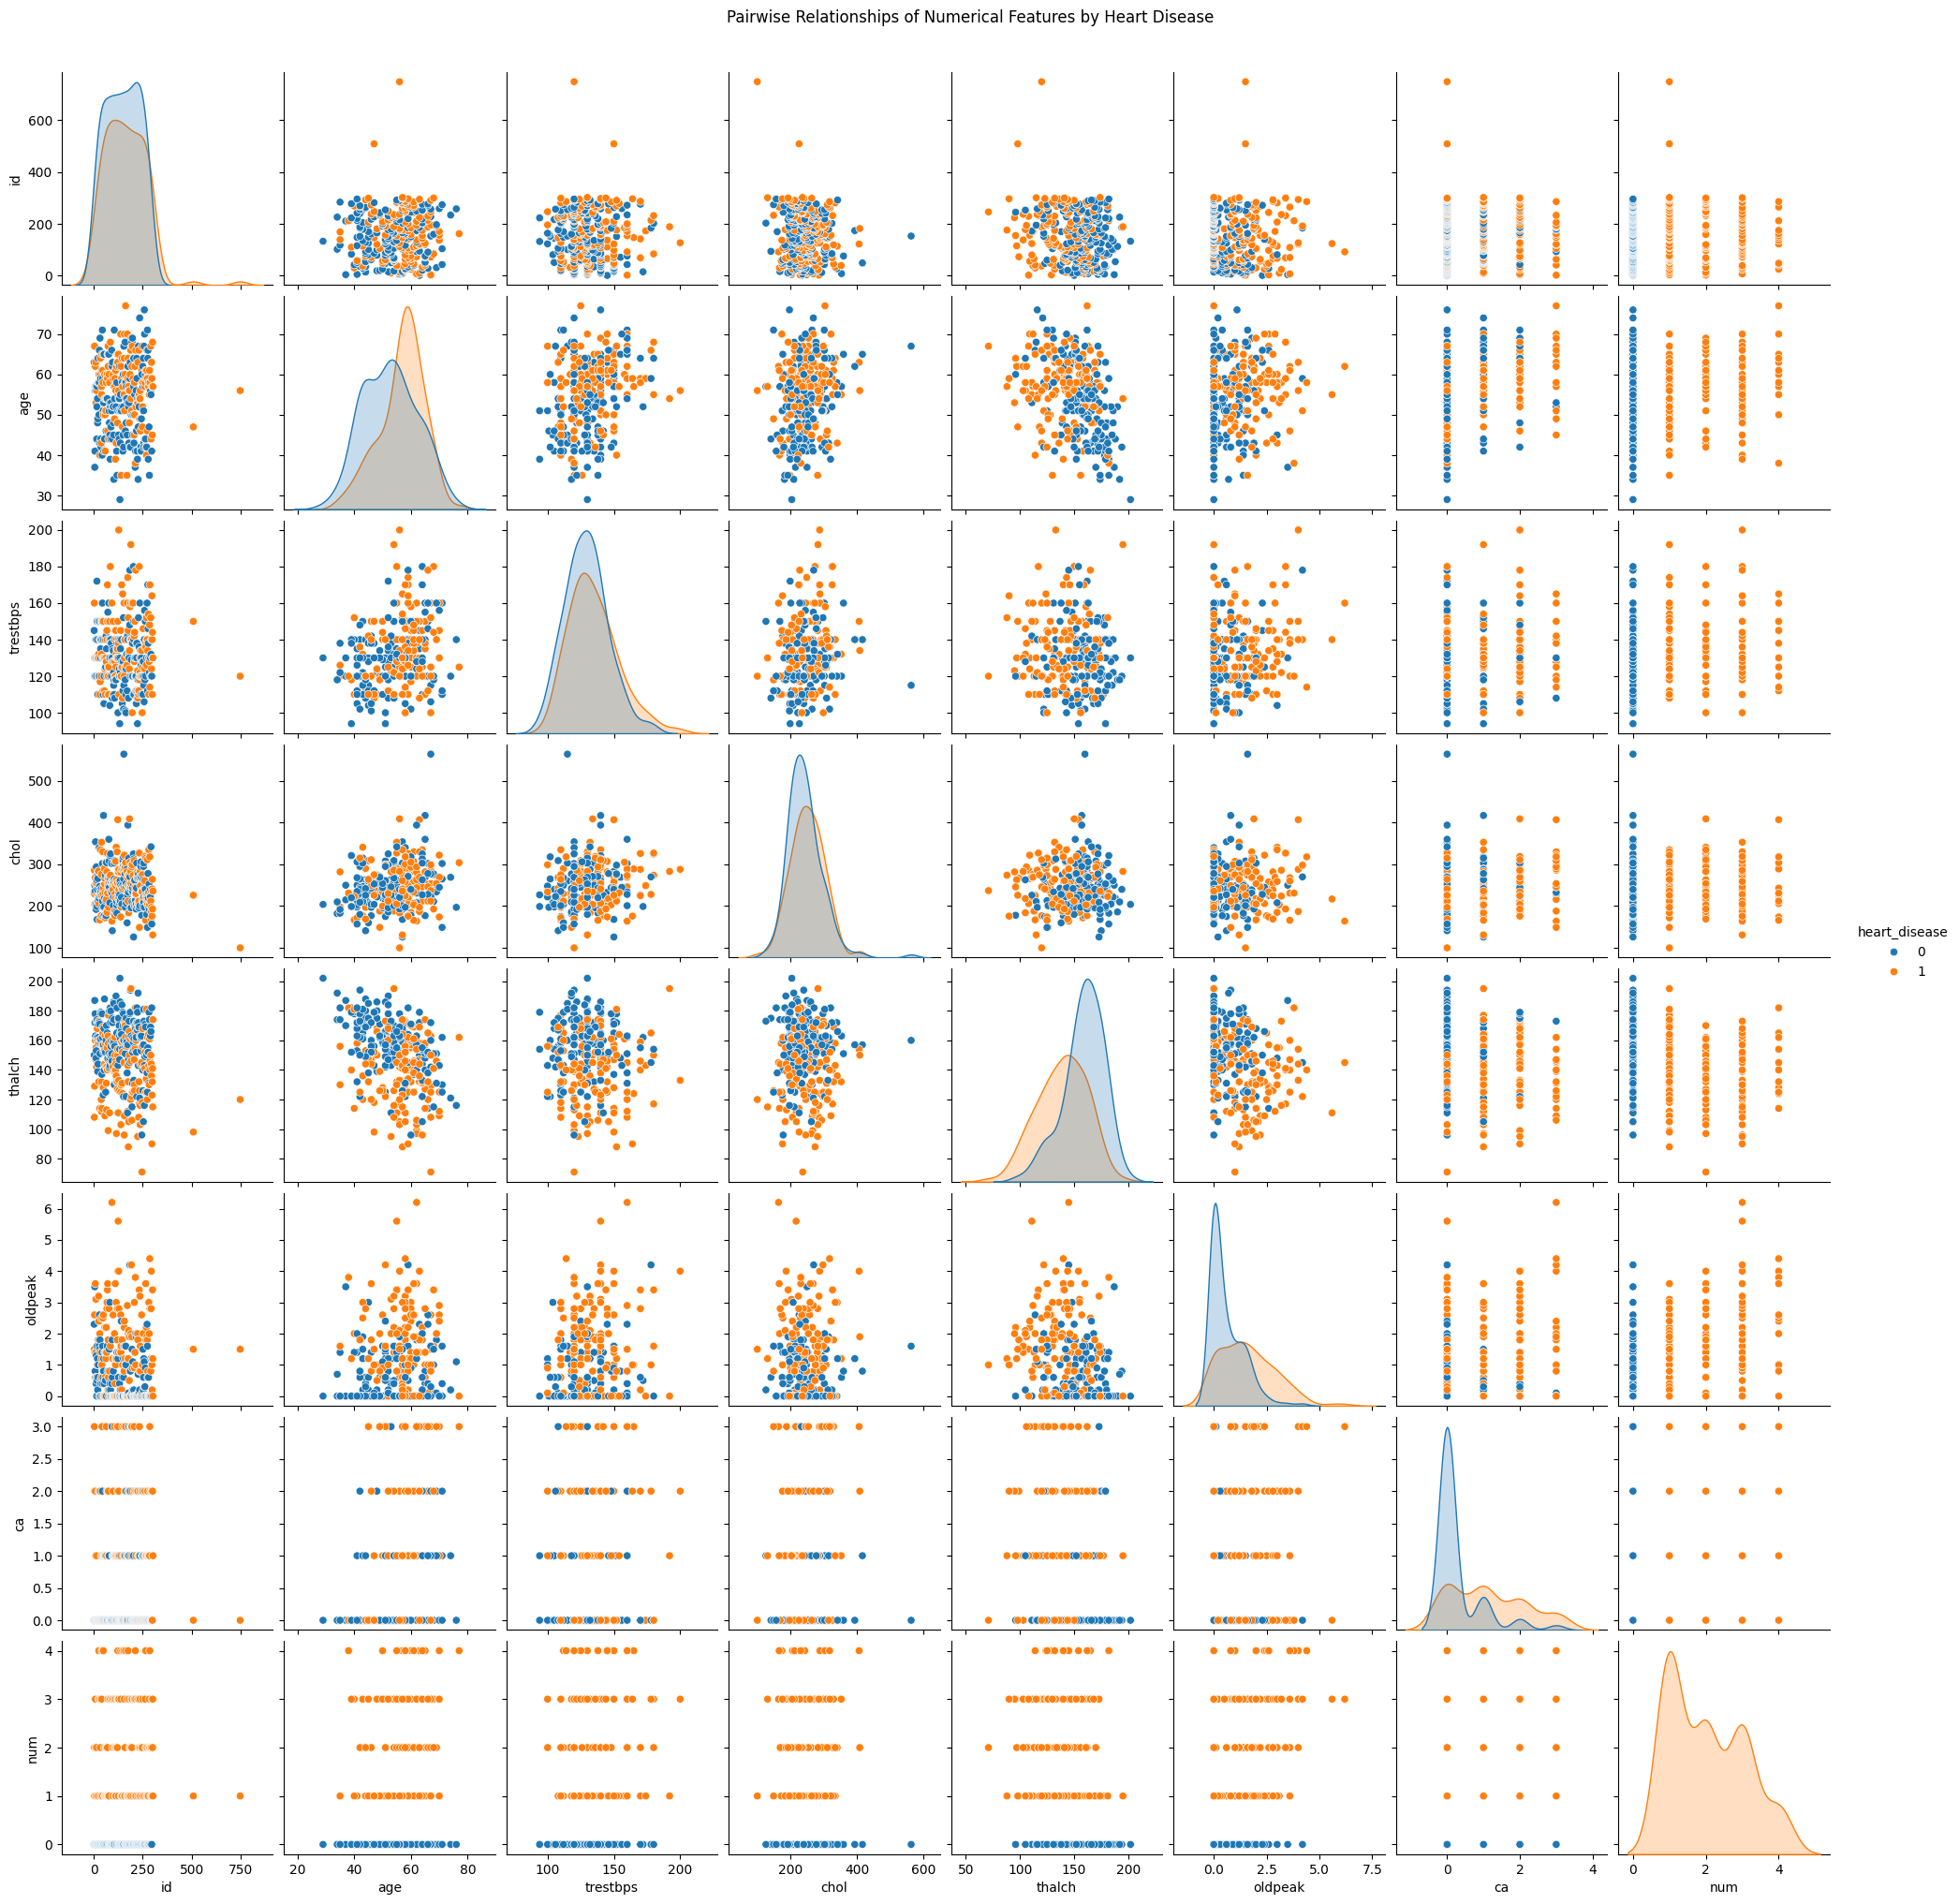

In [50]:
# Examine relationships between numerical features, colored by 'heart_disease'
sns.pairplot(numeric_df, hue='heart_disease', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Numerical Features by Heart Disease', y=1.02)
plt.show()

## Split the data



In [51]:
X = df.drop(['num', 'heart_disease'], axis=1)
y = df['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create a model


In [52]:
model = LogisticRegression(max_iter=5000)
print("Selected Model: Logistic Regression")

Selected Model: Logistic Regression


## Train the model

Train the selected Logistic Regression model on the training data.


Identify non-numeric columns in X_train and apply one-hot encoding to convert them into a numeric format suitable for the Logistic Regression model. Then fit the model to the processed training data.



In [53]:
# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=np.number).columns
print(f"Non-numeric columns: {list(non_numeric_cols)}")

# Apply one-hot encoding to non-numeric columns
X_train_encoded = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)

# Fit the Logistic Regression model
model.fit(X_train_encoded, y_train)
print("Logistic Regression model trained successfully.")

Non-numeric columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Logistic Regression model trained successfully.


## Evaluate the model



Evaluate the performance of the trained Logistic Regression model on the testing data using appropriate metrics by making predictions, calculating accuracy, generating a confusion matrix, printing a classification report, and calculating the AUC-ROC.



Accuracy: 0.8833

Confusion Matrix:


array([[31,  4],
       [ 3, 22]])


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.85      0.88      0.86        25

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60


AUC-ROC: 0.9406


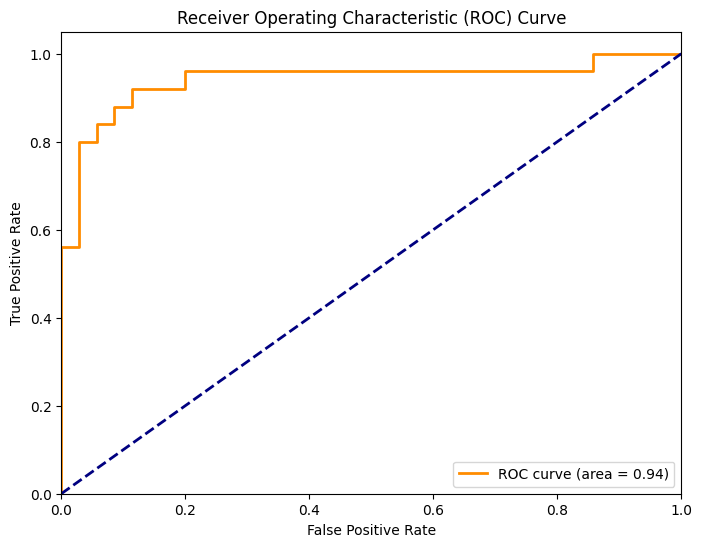

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a list of numerical and categorical column names from the original training data
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Remove 'id' from numerical columns as it's an identifier and not a feature
if 'id' in numerical_cols:
    numerical_cols.remove('id')

# Create a preprocessor using ColumnTransformer
# It scales numerical features and one-hot encodes categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Create a pipeline with the preprocessor and the Logistic Regression model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(max_iter=1000))])

# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_pipeline.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
display(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and print AUC-ROC
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"\nAUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

List coefficients of each feature to understand how much the prediction is effected by a feature.

In [55]:
# Get the trained Logistic Regression model from the pipeline
logistic_model = model_pipeline.named_steps['classifier']

# Get the feature names after one-hot encoding and scaling
# The preprocessor has a get_feature_names_out() method
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get the coefficients from the Logistic Regression model
coefficients = logistic_model.coef_[0]

# Create a pandas Series to easily view feature names and coefficients
coefficients_df = pd.Series(coefficients, index=feature_names)

# Sort coefficients by their absolute value to see the most impactful features
sorted_coefficients = coefficients_df.abs().sort_values(ascending=False)

print("Feature Coefficients (sorted by absolute value):")
display(coefficients_df[sorted_coefficients.index])

Feature Coefficients (sorted by absolute value):


,0
num__ca,1.055388
cat__cp_asymptomatic,0.987708
cat__sex_Female,-0.667570
cat__sex_Male,0.667506
cat__cp_non-anginal,-0.659237
cat__cp_typical angina,-0.624831
cat__thal_reversable defect,0.566551
cat__slope_flat,0.515858
cat__exang_False,-0.455237
cat__exang_True,0.455173


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully split into training and testing sets with a test size of 20%.
*   Logistic Regression was selected as the classification model due to its suitability for binary classification and interpretability.
*   The Logistic Regression model was successfully trained on the scaled numerical features and one-hot encoded categorical features of the training data.
*   The model achieved an accuracy of approximately 0.8833 on the test set.
*   The confusion matrix showed 31 true negatives, 22 true positives, 4 false positives, and 3 false negatives.
*   The model demonstrated good performance metrics for both classes, with precision, recall, and F1-scores around 0.88.
*   The AUC-ROC score was approximately 0.9406, indicating strong discriminatory power.

### Insights or Next Steps

*   The Logistic Regression model shows good performance on this dataset for predicting heart disease.
*   Further analysis could involve exploring other models (e.g., Decision Tree, SVM) or hyperparameter tuning for potential performance improvements.
